In [2924]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import softmax
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# ignorování warningů
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2925]:
# načtení dat pro první úlohu
first_task_data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 1')
first_task_data


,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


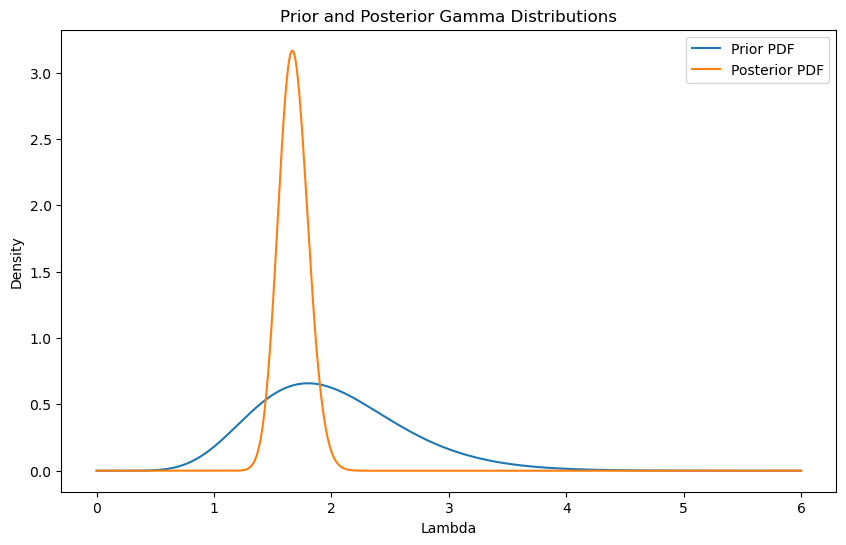

In [2926]:
subtask_a_data = first_task_data["uloha_1 a)"].dropna()

alpha_prior = 10.0
beta_prior = 5.0

alpha_posterior = alpha_prior + subtask_a_data.sum()
beta_posterior = beta_prior + subtask_a_data.size

lambda_values = np.linspace(0, 6, 10000)

prior_pdf = stats.gamma.pdf(lambda_values, a=alpha_prior, scale= 1 / beta_prior)
posterior_pdf = stats.gamma.pdf(lambda_values, a=alpha_posterior, scale= 1 / beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, prior_pdf, label='Prior PDF')
plt.plot(lambda_values, posterior_pdf, label='Posterior PDF')
plt.title('Prior and Posterior Gamma Distributions')
plt.xlabel('Lambda')
plt.ylabel('Density')
plt.legend()
plt.show()


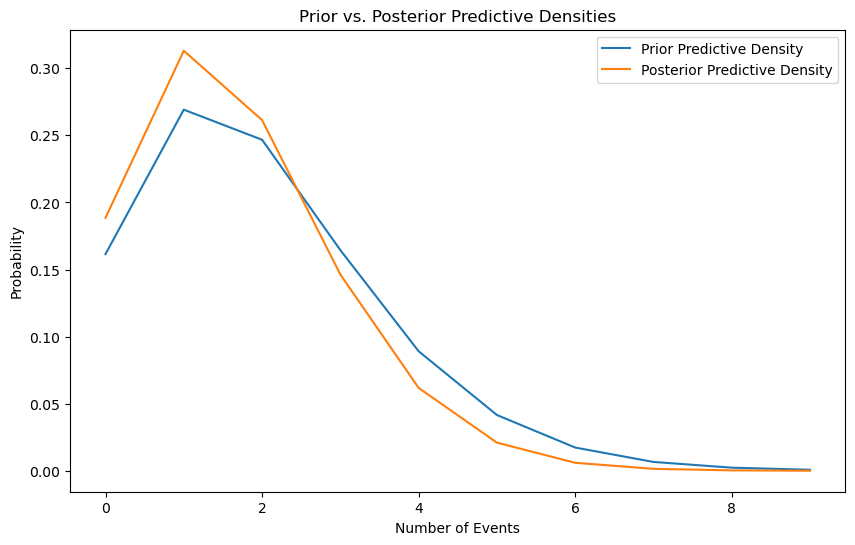

In [2927]:
r_prior = alpha_prior
r_posterior = alpha_posterior
p_prior = beta_prior / (beta_prior + 1)
p_posterior = beta_posterior / (beta_posterior + 1)

padding = 5
max_connections = subtask_a_data.max()

x_values = np.arange(0, max_connections + padding)

prior_predictive_probs = stats.nbinom.pmf(x_values, r_prior, p_prior)
posterior_predictive_probs = stats.nbinom.pmf(x_values, r_posterior, p_posterior)

plt.figure(figsize=(10, 6))
plt.plot(x_values, prior_predictive_probs, label='Prior Predictive Density')
plt.plot(x_values, posterior_predictive_probs, label='Posterior Predictive Density')
plt.title('Prior vs. Posterior Predictive Densities')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()


Porovnat intervalové odhady.. TODO!

In [2928]:
lower_percentile = 0.025  
upper_percentile = 0.975

lambda_prior_lower = stats.gamma.ppf(lower_percentile, a=alpha_prior, scale=1/beta_prior)
lambda_prior_upper = stats.gamma.ppf(upper_percentile, a=alpha_prior, scale=1/beta_prior)

lambda_posterior_lower = stats.gamma.ppf(lower_percentile, a=alpha_posterior, scale=1/beta_posterior)
lambda_posterior_upper = stats.gamma.ppf(upper_percentile, a=alpha_posterior, scale=1/beta_posterior)

print("95% interval spolehlivosti pro parametr 𝜆 z aprio. rozdělení: <{}, {}>".format(lambda_prior_lower, lambda_prior_upper))
print("95% interval spolehlivosti pro parametr 𝜆 z apost. rozdělení: <{}, {}>".format(lambda_posterior_lower, lambda_posterior_upper))


95% interval spolehlivosti pro parametr 𝜆 z aprio. rozdělení: <0.9590777392264868, 3.416960690283833>
95% interval spolehlivosti pro parametr 𝜆 z apost. rozdělení: <1.4376938284869922, 1.9327207471868797>


Porovnat bodové odhady... TODO!

In [2929]:
lambda_posterior_mean = alpha_posterior / beta_posterior
lambda_posterior_median = stats.gamma.median(a=alpha_posterior, scale=1/beta_posterior)
lambda_posterior_mode = lambda_values[posterior_pdf.argmax()]

print("Bodový odhad parametru 𝜆 na základě střední hodnoty:", lambda_posterior_mean)
print("Bodový odhad parametru 𝜆 na základě mediánu:", lambda_posterior_median)
print("Bodový odhad parametru 𝜆 na základě modusu:", lambda_posterior_mode)


Bodový odhad parametru 𝜆 na základě střední hodnoty: 1.6761904761904762
Bodový odhad parametru 𝜆 na základě mediánu: 1.6730169441241727
Bodový odhad parametru 𝜆 na základě modusu: 1.666966696669667


Vybrat jeden pro aprio, jeden pro posterio a komentovat... TODO!

In [2930]:
print(r_prior, p_prior)
print(r_posterior, p_posterior)

events_prior_mean = r_prior * (1.0 - p_prior) / p_prior
events_prior_median = stats.nbinom.ppf(0.5, r_prior, p_prior)
events_prior_mode = x_values[prior_predictive_probs.argmax()]


print("(Apriori) Bodový odhad počtu pozorování na základě střední hodnoty:", events_prior_mean)
print("(Apriori) odhad počtu pozorování na základě mediánu:", events_prior_median)
print("(Apriori) odhad počtu pozorování na základě modusu:", events_prior_mode)


events_posterior_mean = r_posterior * (1.0 - p_posterior) / p_posterior
events_posterior_median = stats.nbinom.ppf(0.5, r_posterior, p_posterior)
events_posterior_mode = x_values[prior_predictive_probs.argmax()]

print("(Aposteriori) Bodový odhad počtu pozorování na základě střední hodnoty:", events_posterior_mean)
print("(Aposteriori) Bodový odhad počtu pozorování na základě mediánu:", events_posterior_median)
print("(Aposteriori) Bodový odhad počtu pozorování na základě modusu:", events_posterior_mode)


10.0 0.8333333333333334
176.0 0.9905660377358491
(Apriori) Bodový odhad počtu pozorování na základě střední hodnoty: 1.9999999999999996
(Apriori) odhad počtu pozorování na základě mediánu: 2.0
(Apriori) odhad počtu pozorování na základě modusu: 1.0
(Aposteriori) Bodový odhad počtu pozorování na základě střední hodnoty: 1.6761904761904758
(Aposteriori) Bodový odhad počtu pozorování na základě mediánu: 1.0
(Aposteriori) Bodový odhad počtu pozorování na základě modusu: 1.0


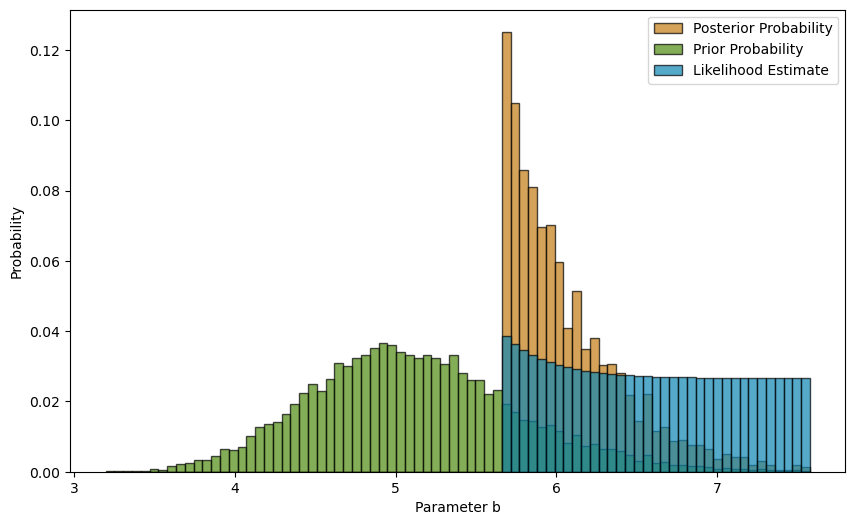

In [2931]:
# z každé skupiny vybereme maximální hodnotu
subtask_b_prior = first_task_data[["uloha_1 b)_prior", "skupina"]].groupby("skupina").max()
subtask_b_observations = first_task_data["uloha_1 b)_pozorování"].dropna()

bin_values_num = 80

# soubor maximálních hodnot z jednotlivých skupin setřídíme do 80 binů o stejné šířce
prior_freq, bins = np.histogram(subtask_b_prior, bins=bin_values_num)
prior_prob = prior_freq / prior_freq.sum()

# vypočítáme středy binů
bin_centers = 0.5 * (bins[1:] + bins[:-1])

mu = 3
sigma = 1
a_standard = (1 - mu) / sigma

log_likelihoods = []

# pro středy všech binů (reprezentující parametr b) vypočítáme logaritmus likelihoodu
# jinými slovy vypočítáme, jak dobře odpovídají poskytnutá pozorování odseknutému normálnímu
# rozdělení pro různé hodnoty parametru b
for b in bin_centers:
  b_standard = (b - mu) / sigma
  log_pdf_values = stats.truncnorm(a=a_standard, b=b_standard, loc=mu, scale=sigma).logpdf(subtask_b_observations)
  log_likelihoods.append(np.sum(log_pdf_values))


# pomocí softmaxu převedeme logaritmy likelihoodů na pravděpodobnosti
likelihood_prob = softmax(log_likelihoods)


# vypočítáme aposteriorní pravděpodobnosti pomocí Bayesova vzorce
posterior_freq = prior_prob * likelihood_prob
posterior_prob = posterior_freq / posterior_freq.sum()

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins, weights=posterior_prob, label='Posterior Probability', alpha=0.7, color='#C47B12', edgecolor='black')
plt.hist(bins[:-1], bins, weights=prior_prob, label='Prior Probability', alpha=0.7, color='#508A11', edgecolor='black')
plt.hist(bins[:-1], bins, weights=likelihood_prob, label='Likelihood Estimate', alpha=0.7, color='#0F86B3', edgecolor='black')
plt.xlabel('Parameter b')
plt.ylabel('Probability')
plt.legend()
plt.show()


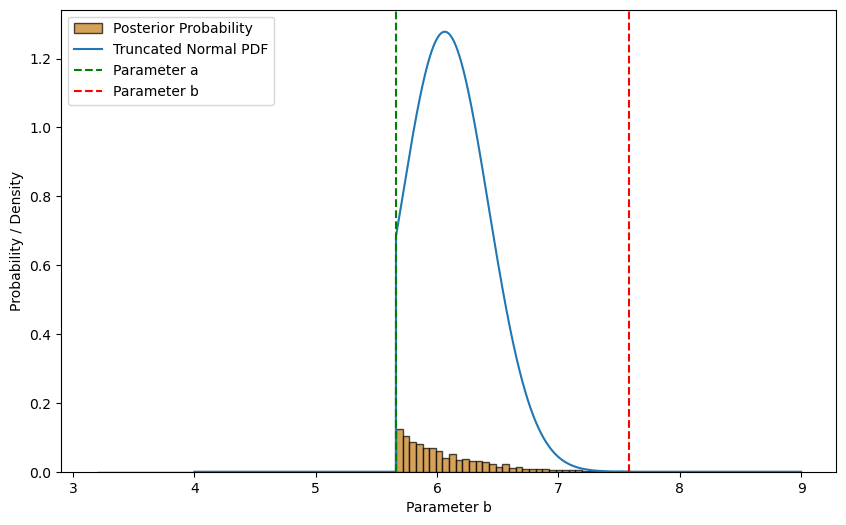

(Histogram) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <5.688232034015019, 7.003430634180411>
(Hustota pravděpodobnosti) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <5.695559618614321, 6.788843572739788>


In [2932]:
# výpočet 95% intervalu spolehlivosti na základě histogramu
cumulative_probs = np.cumsum(posterior_prob)

# najdeme bin, který +- odpovídá 2.5 percentilu
lower_idx = np.argmax(cumulative_probs >= 0.025)
b_posteriro_lower_hist = bin_centers[lower_idx]

# najdeme bin, který +- odpovídá 97.5 percentilu
upper_idx = np.argmax(cumulative_probs >= 0.975)
b_posteriro_upper_hist = bin_centers[upper_idx]

mean = np.sum(bin_centers * posterior_prob)
std_dev = np.sqrt(np.sum(posterior_prob * (bin_centers - mean)**2))

# výpočet 95% intervalu spolehlivosti na základě hustoty pravděpodobnosti
a = posterior_prob.nonzero()[0][0]
a_standard = (bins[a] - mean) / std_dev
b_standard = (bins[-1] - mean) / std_dev

x_range = np.linspace(4, 9, 5000)

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins, weights=posterior_prob, label='Posterior Probability', alpha=0.7, color='#C47B12', edgecolor='black')
plt.plot(x_range, stats.truncnorm.pdf(x_range, a=a_standard, b=b_standard, loc=mean, scale=std_dev), label='Truncated Normal PDF',)
plt.axvline(x=bins[a], color='green', linestyle='--', label='Parameter a')
plt.axvline(x=bins[-1], color='red', linestyle='--', label='Parameter b')
plt.xlabel('Parameter b')
plt.ylabel('Probability / Density')
plt.legend()
plt.show()

b_posteriro_lower_pdf = stats.truncnorm.ppf(lower_percentile, a=a_standard, b=b_standard, loc=mean, scale=std_dev)
b_posteriro_upper_pdf = stats.truncnorm.ppf(upper_percentile, a=a_standard, b=b_standard, loc=mean, scale=std_dev)

print("(Histogram) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <{}, {}>".format(b_posteriro_lower_hist, b_posteriro_upper_hist))
print("(Hustota pravděpodobnosti) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <{}, {}>".format(b_posteriro_lower_pdf, b_posteriro_upper_pdf))


In [2933]:
mode = bin_centers[posterior_prob.argmax()]
median = stats.truncnorm.median(a=a_standard, b=b_standard, loc=mean, scale=std_dev)

print("Bodový odhad parametru b na základě střední hodnoty:", mean)
print("Bodový odhad parametru b na základě mediánu:", median)
print("Bodový odhad parametru b na základě modusu:", mode)


Bodový odhad parametru b na základě střední hodnoty: 6.063248915799402
Bodový odhad parametru b na základě mediánu: 6.122678249666167
Bodový odhad parametru b na základě modusu: 5.688232034015019


# Lineární regrese

In [2934]:
# načtení dat pro druhou úlohu
second_task_data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 2')
initial_second_task_data = second_task_data.copy()

# vytvoříme dummy proměnné pro kategorickou proměnnou OSType
# IS_MacOS == 0 ^ IS_Windows == 0 ^ IS_iOS == 0 => IS_Android == 1
dummy_variables = pd.get_dummies(second_task_data['OSType'], drop_first=True, prefix="IS").astype(float)  

# z data framu odstraníme původní kategorickou proměnnou a přidáme dummy proměnné
second_task_data = second_task_data.drop('OSType', axis=1).join(dummy_variables)
second_task_data.head()


,ActiveUsers,InteractingPct,ScrollingPct,Ping [ms],IS_MacOS,IS_Windows,IS_iOS
0,4113,0.8283,0.1717,47,0.0,0.0,1.0
1,7549,0.3461,0.6539,46,0.0,0.0,1.0
2,8855,0.2178,0.7822,55,0.0,1.0,0.0
3,8870,0.0794,0.9206,56,0.0,0.0,0.0
4,9559,0.7282,0.2718,76,1.0,0.0,0.0


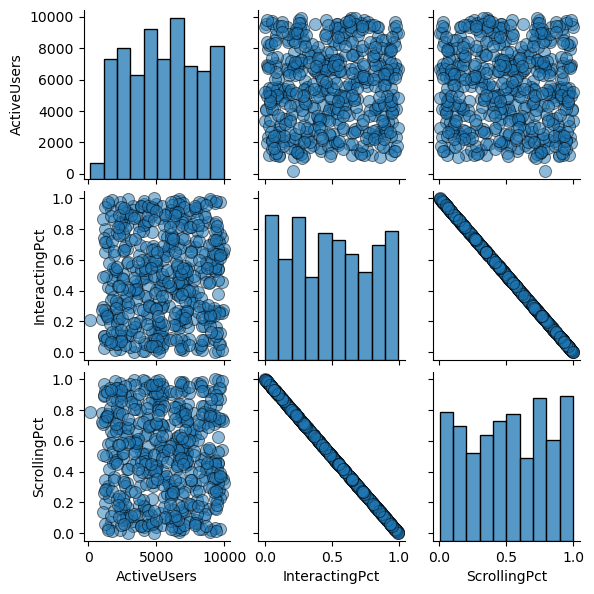

In [2935]:
predictors = second_task_data[['ActiveUsers', 'InteractingPct', 'ScrollingPct']]

# vztahy jednotlivých prediktorů
sns.pairplot(predictors, plot_kws={'alpha': 0.5, 's': 75, 'edgecolor': 'k'}, height=2.)


In [2936]:
# proměnné InteractingPct a ScrollingPct jsou linárně závislé, jednu z nich tedy odstraníme
second_task_data.drop('InteractingPct', axis=1, inplace=True)
second_task_data.head()


,ActiveUsers,ScrollingPct,Ping [ms],IS_MacOS,IS_Windows,IS_iOS
0,4113,0.1717,47,0.0,0.0,1.0
1,7549,0.6539,46,0.0,0.0,1.0
2,8855,0.7822,55,0.0,1.0,0.0
3,8870,0.9206,56,0.0,0.0,0.0
4,9559,0.2718,76,1.0,0.0,0.0


## Výchozí plný kvadratický model
$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2 + \beta_4 X_2^2 + \beta_5 X_1X_2 + \beta_6 C_1 + \beta_7 C_2 + \beta_8 C_3 + \beta_9 X_1C_1 + \beta_{10} X_1C_2 + \beta_{11} X_1C_3 + \beta_{12} X_2C_1 + \beta_{13} X_2C_2 + \beta_{14} X_2C_3 \epsilon$

$Y$ je závislá proměnná `Ping [ms]`. \
$X_1, X_2$ jsou nezávislé spojité proměnné `ActiveUsers` a `ScrollingPct`. \
$C_1, C_2, C_3$ jsou kategorické proměnné `IS_MacOS`, `IS_Windows` a `IS_iOS`. \
$\beta_0, \beta_1, \beta_2, \dotsc, \beta_8$ jsou hledané koeficienty. \
$\epsilon$ reprezntuje chybu způsobenou šumem ve vstupních datech.



In [2937]:
# standardizace prediktorů do intervalu <-1, 1>
min_values = second_task_data.drop(['Ping [ms]'], axis=1).min(axis=0)
max_values = second_task_data.drop(['Ping [ms]'], axis=1).max(axis=0)
predict_cols =  second_task_data.columns.drop('Ping [ms]')
second_task_data[predict_cols] = -1 + 2 * (second_task_data[predict_cols] - min_values) / (max_values - min_values) 

# přidání kvadratických a smíšených členů
second_task_data['ActiveUsers_squared'] = second_task_data['ActiveUsers'] ** 2
second_task_data['ScrollingPct_squared'] = second_task_data['ScrollingPct'] ** 2
second_task_data['ActiveUsers_ScrollingPct'] = second_task_data['ActiveUsers'] * second_task_data['ScrollingPct']
second_task_data['ActiveUsers_IS_MacOS'] = second_task_data['ActiveUsers'] * second_task_data['IS_MacOS']
second_task_data['ActiveUsers_IS_Windows'] = second_task_data['ActiveUsers'] * second_task_data['IS_Windows']
second_task_data['ActiveUsers_IS_iOS'] = second_task_data['ActiveUsers'] * second_task_data['IS_iOS']
second_task_data['ScrollingPct_IS_MacOS'] = second_task_data['ScrollingPct'] * second_task_data['IS_MacOS']
second_task_data['ScrollingPct_IS_Windows'] = second_task_data['ScrollingPct'] * second_task_data['IS_Windows']
second_task_data['ScrollingPct_IS_iOS'] = second_task_data['ScrollingPct'] * second_task_data['IS_iOS']

init_predictors = ['ActiveUsers', 'ActiveUsers_squared', 'ScrollingPct', 'ScrollingPct_squared', 'ActiveUsers_ScrollingPct', 
              'IS_MacOS', 'IS_Windows', 'IS_iOS', 'ActiveUsers_IS_MacOS', 'ActiveUsers_IS_Windows', 'ActiveUsers_IS_iOS', 
              'ScrollingPct_IS_MacOS', 'ScrollingPct_IS_Windows', 'ScrollingPct_IS_iOS']

X = sm.add_constant(second_task_data[init_predictors])
y = second_task_data['Ping [ms]']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Ping [ms]   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        20:05:26   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [2938]:
continue_removal = True
alpha = 0.05

while continue_removal:
    p_values = model.pvalues
    highest_p_value_idx = p_values.idxmax()

    if p_values[highest_p_value_idx] > alpha:
        X.drop(columns=[highest_p_value_idx], inplace=True)
        model = sm.OLS(y, X).fit()
        print(model.summary())
    else:
        continue_removal = False


                            OLS Regression Results                            
Dep. Variable:              Ping [ms]   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.58e-187
Time:                        20:05:26   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3225.
Df Residuals:                     488   BIC:                             3284.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

                               VIF
const                     5.494647
ActiveUsers               4.124834
ActiveUsers_squared       1.143915
ScrollingPct              1.031438
ActiveUsers_ScrollingPct  1.036824
IS_MacOS                  1.728634
IS_Windows                1.713664
IS_iOS                    1.650624
ActiveUsers_IS_MacOS      2.232872
ActiveUsers_IS_Windows    2.165669
ActiveUsers_IS_iOS        2.286647


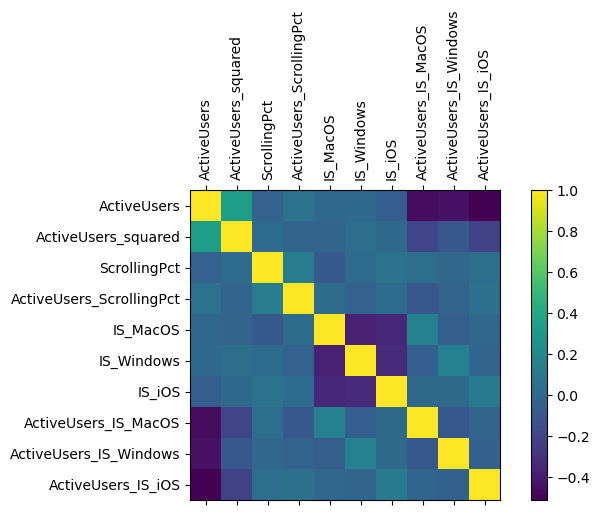

In [2939]:
# VIF
vif_df = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns).to_frame()
vif_df.columns = ['VIF']
print(vif_df)

# korelační matice
X_no_const = X.copy().drop(columns=['const'])
plt.figure(figsize=(8, 4))
plt.matshow(X_no_const.corr(),fignum=1)
plt.xticks(range(len(X_no_const.columns)), X_no_const.columns, rotation=90)
plt.yticks(range(len(X_no_const.columns)), X_no_const.columns)
plt.colorbar()
plt.show()


Pozorování s velkou Cook's distance - indexy: []
Pozorování s velkou pákou - indexy: [476]
Pozorování s velkými rezidui - indexy: [ 82 255 476]


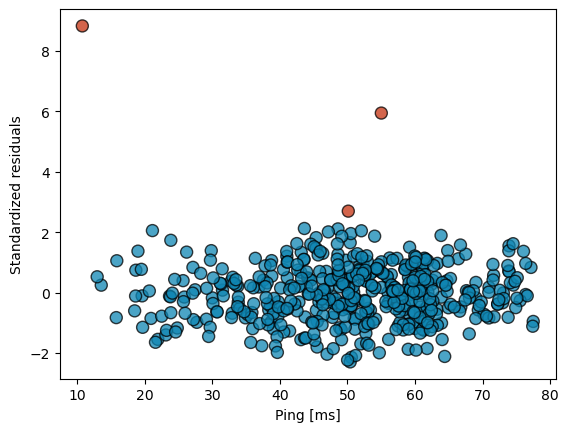

In [2940]:
influence = model.get_influence()

# podezřelé hodnoty - p_value < 0.05
_, p_value = influence.cooks_distance
cooks_distance_outliers_idxs = np.where(p_value < 0.05)[0]
print("Pozorování s velkou Cook's distance - indexy:", cooks_distance_outliers_idxs)

# podezřelé hodnoty - leverage >  3 x počet parametrů / počet pozorování
leverage = influence.hat_matrix_diag
leverage_outliers_idx = np.where(leverage > 3 * model.params.size / X.shape[0])[0]
print("Pozorování s velkou pákou - indexy:",leverage_outliers_idx)

# podezřelé hodnoty - absolutní hodnoty standardizovaných reziduí větší než 2.5
standardized_residuals = influence.resid_studentized_internal
resid_outliers_idxs = np.where(np.abs(standardized_residuals) > 2.5)[0]
print("Pozorování s velkými rezidui - indexy:", resid_outliers_idxs)

all_outliers_idxs = np.unique(np.concatenate((cooks_distance_outliers_idxs, leverage_outliers_idx, resid_outliers_idxs)))

colors = np.array(['#0F86B3'] * X.shape[0])
colors[all_outliers_idxs] = '#C53110'

plt.scatter(model.fittedvalues, standardized_residuals, alpha=0.75, s=75, edgecolor='k', c=colors)
plt.xlabel('Ping [ms]')
plt.ylabel('Standardized residuals')
plt.show()


In [2941]:
# odstranění podezřelých pozorování
X.drop([476, 255], inplace=True)

# re-normalizace prediktorů
min_values = X.drop(['const'], axis=1).min(axis=0)
max_values = X.drop(['const'], axis=1).max(axis=0)
predict_cols =  X.columns.drop('const')
X[predict_cols] = -1 + 2 * (X[predict_cols] - min_values) / (max_values - min_values) 

y.drop([476, 255], inplace=True)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Ping [ms]   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     349.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.28e-215
Time:                        20:05:27   Log-Likelihood:                -1528.7
No. Observations:                 500   AIC:                             3079.
Df Residuals:                     489   BIC:                             3126.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

TODO!

$Ping [ms] = 32.8058 + 0.0075 \times ActiveUsers - 4.638e \times 10^-7 \times ActiveUsers^2 - 33.2161 \times ScrollingPct + 0.00029 \times ActiveUsers ScrollingPct + 9.1089 \times IS\_MacOS + 3.6293 \times IS\_Windows - 5.4243 \times IS\_iOS$

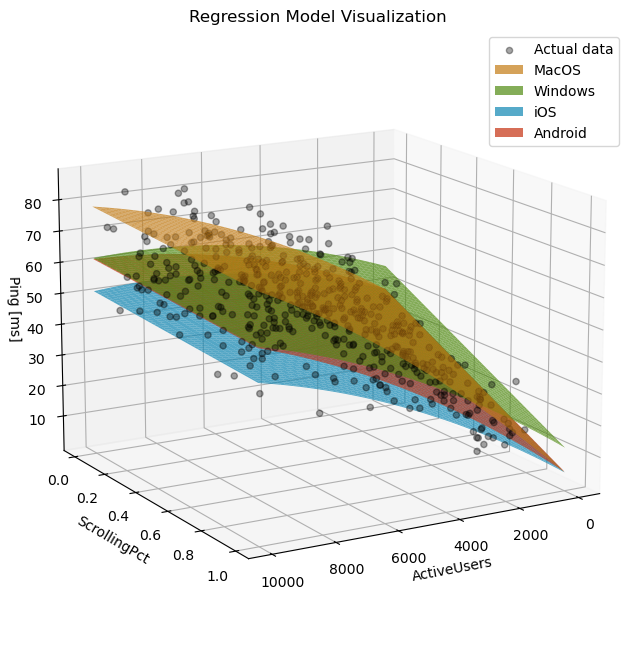

In [2942]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# vykreslení naměřených hodnot
data = initial_second_task_data.drop([476, 255], axis=0)
ax.scatter(data['ActiveUsers'], data['ScrollingPct'], y, color='black', alpha=0.35 , label='Actual data')

number_of_points = 100

x_axis_points = np.linspace(-1, 1, number_of_points)
y_axis_points = np.linspace(-1, 1, number_of_points)

x_surf, y_surf = np.meshgrid(x_axis_points, y_axis_points)

flattened_x = x_surf.flatten()
flattened_y = y_surf.flatten()

# denormalizace osy x a y
x_surf_denormalized = 10000 * (x_surf + 1) / 2
y_surf_denormalized = (y_surf + 1) / 2

os_cases = (
    ('MacOS', [1.0, -1.0, -1.0], "#C47B12"),
    ('Windows', [-1.0, 1.0, -1.0], "#508A11"),
    ('iOS', [-1.0, -1.0, 1.0] , "#0F86B3"),
    ('Android', [-1.0, -1.0, -1.0] , "#C53110")
)

base_predict_df = pd.DataFrame({
    'ActiveUsers': flattened_x, 
    'ActiveUsers_squared': flattened_x ** 2,
    'ScrollingPct': flattened_y,
    'ActiveUsers_ScrollingPct': flattened_y * flattened_x,
})

# vykreslení zakřivených ploch pro jednotlivé operační systémy
for os_name, os_values, os_color in os_cases:
  predict_df = sm.add_constant(base_predict_df.copy())

  predict_df[['IS_MacOS','IS_Windows','IS_iOS']] = os_values
  predict_df[['ActiveUsers_IS_MacOS', 'ActiveUsers_IS_Windows', 'ActiveUsers_IS_iOS']] = (
        predict_df['ActiveUsers'].values[:, np.newaxis] * np.array(os_values)
    )
  
  fittedY = model.predict(predict_df)

  fittedY = np.array(fittedY).reshape(x_surf_denormalized.shape)

  ax.plot_surface(x_surf_denormalized, y_surf_denormalized, fittedY, alpha=0.7, label=os_name, facecolor=os_color)

ax.set_xlabel('ActiveUsers')
ax.set_ylabel('ScrollingPct')
ax.set_zlabel('Ping [ms]', labelpad=0)
ax.view_init(elev=15, azim=60) 
plt.title('Regression Model Visualization')
plt.legend()
plt.show()
